In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lzw(data, codeSize):
    x = 256
    dictionary = {chr(i): i for i in range(x)}
    maxTableSize = 2 ** codeSize
    string = ""
    compressed = []
    for symbol in data:
        string1 = string + chr(symbol)
        if string1 in dictionary:
            string = string1
        else:
            if len(dictionary) < maxTableSize:
                dictionary[string1] = x
                x += 1
            compressed.append(dictionary[string])
            string = chr(symbol)
    if string in dictionary:
        compressed.append(dictionary[string])

    return compressed

def lzw_encode(img, blockSize=-1, codeSize=12):
    file = open("img_lzwcode.txt", "w")
    lzwCompressed = []
    if blockSize == -1:
        blockSize = img.shape[0] * img.shape[1]
    file.write(str(img.shape[0]) + " " + str(img.shape[1]) + " " + str(blockSize) + "\n")
    img = img.reshape(-1)
    for i in range(0, img.shape[0], blockSize):
        data=img[i:i+blockSize]
        for j in data:
            file.write(str(j) + " ")
        file.write("\n")
        lzwCompressed += lzw(data, codeSize)
    
    return lzwCompressed

Maximum Coded Value:  2910
Number of codes:  2657
Compression Ratio:  24.665412118931126
Average Code Length:  0.48651123046875
Entropy:  0.053398137066313175


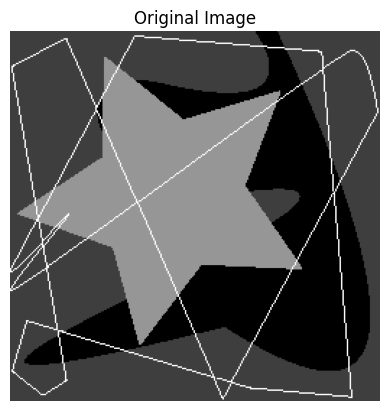

In [3]:
# filename = input("Enter the filename: ")
filename = "img1.tif"
# blockSize = input("Enter the block size: ")
blockSize = -1
# codeSize = input("Enter the code size: ")
codeSize = 12

img = cv.imread(filename, 0)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
lzwEncodedArray = lzw_encode(img, blockSize, codeSize)

# Maximum coded value used
maxCodedValue = max(lzwEncodedArray)
print("Maximum Coded Value: ", maxCodedValue)

# Number of codes 
print("Number of codes: ", len(lzwEncodedArray))

# Compression Ratio
compRatio = (img.shape[0] * img.shape[1])/len(lzwEncodedArray)
print("Compression Ratio: ", compRatio)

# Average length of code
avgCodeLength = len(lzwEncodedArray) * codeSize / (img.shape[0] * img.shape[1])
print("Average Code Length: ", avgCodeLength)

# Entropy
entropy = 0
for i in range(256):
    p = lzwEncodedArray.count(i) / len(lzwEncodedArray)
    if p != 0:
        entropy += p * np.log2(p)
entropy = -entropy
print("Entropy: ", entropy)